In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

path = 'https://mda-noise.s3.eu-central-1.amazonaws.com/'
df_01 = pd.read_csv(path+"df_01.csv")
df_02 = pd.read_csv(path+"df_02.csv")
df_03 = pd.read_csv(path+"df_03.csv")
df_04 = pd.read_csv(path+"df_04.csv")
df_05 = pd.read_csv(path+"df_05.csv")
df_06 = pd.read_csv(path+"df_06.csv")
df_07 = pd.read_csv(path+"df_07.csv")
df_09 = pd.read_csv(path+"df_09.csv")

name_df = ['df_01','df_02','df_03','df_04','df_05','df_06','df_07','df_09']
list_df = [df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_09]
#make variables "weekend" from 'weekday' (1 if saturday/sunday) and 'daytime' from start_hour (1 if 20-05)
def weekend_daytime(df):
  df['Thursday-Friday'] = df['weekday'].isin(['Thursday','Friday']).astype(int)
  df['Saturday'] = df['weekday'].isin(['Saturday']).astype(int)
  df['late-at-night'] = df['start_hour'].isin([0,1,2,3,4]).astype(int)
  df['date'] = pd.to_datetime(df['date'])
  # df['summer'] = (df['date'] >= '2022-07-01') & (df['date'] <= '2022-08-31').astype(int)
  return df

for i in list_df:
  i = weekend_daytime(i)



In [59]:

# i=0;
# list_df[i]['date'] = pd.to_datetime(list_df[i]['date']);
# list_df[i] = list_df[i].dropna(subset=['laf50_per_hour']);
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-03-01') & (list_df[i]['date']<='2022-03-31')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-04-01') & (list_df[i]['date']<='2022-04-30')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-05-01') & (list_df[i]['date']<='2022-05-31')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-06-01') & (list_df[i]['date']<='2022-06-30')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-07-01') & (list_df[i]['date']<='2022-07-31')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-08-01') & (list_df[i]['date']<='2022-08-31')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-09-01') & (list_df[i]['date']<='2022-09-30')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-10-01') & (list_df[i]['date']<='2022-10-31')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-11-01') & (list_df[i]['date']<='2022-11-30')].mean())
# print(list_df[i]['noisiness'][(list_df[i]['date']>='2022-12-01') & (list_df[i]['date']<='2022-12-31')].mean())




In [60]:
list_df[3]

,date,day,time,start_hour,weekday,LC_HUMIDITY,LC_RAININ,LC_TEMP_QCL3_list,school,loko,depot,location,Latitude,Longitude,laf50_per_hour,baseline,noisiness,Thursday-Friday,Saturday,late-at-night
0,2022-03-01 00:00:00,2022-03-01,00:00-01:00,0,Tuesday,79.722222,0.0,1.932109,1.0,1.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,NaN,49.701818,False,0,0,1
1,2022-03-01 01:00:00,2022-03-01,01:00-02:00,1,Tuesday,78.809524,0.0,1.732657,1.0,1.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,NaN,49.701818,False,0,0,1
2,2022-03-01 02:00:00,2022-03-01,02:00-03:00,2,Tuesday,77.738095,0.0,1.727462,1.0,1.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,NaN,49.701818,False,0,0,1
3,2022-03-01 03:00:00,2022-03-01,03:00-04:00,3,Tuesday,76.714286,0.0,1.934884,1.0,1.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,NaN,49.701818,False,0,0,1
4,2022-03-01 04:00:00,2022-03-01,04:00-05:00,4,Tuesday,79.023810,0.0,1.647822,1.0,1.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,NaN,49.701818,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2022-12-31 19:00:00,2022-12-31,19:00-20:00,19,Saturday,61.357143,0.0,15.681402,1.0,0.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,54.5,51.690459,True,0,1,0
7292,2022-12-31 20:00:00,2022-12-31,20:00-21:00,20,Saturday,57.952381,0.0,15.955844,1.0,0.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,52.8,48.313725,True,0,1,0
7293,2022-12-31 21:00:00,2022-12-31,21:00-22:00,21,Saturday,56.500000,0.0,16.187194,1.0,0.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,51.6,48.313725,True,0,1,0
7294,2022-12-31 22:00:00,2022-12-31,22:00-23:00,22,Saturday,56.261905,0.0,16.059805,1.0,0.0,0.0,"Number 76 (""His & Hears” Hair salon in Leuven)",50.875262,4.700102,52.1,48.313725,True,0,1,0


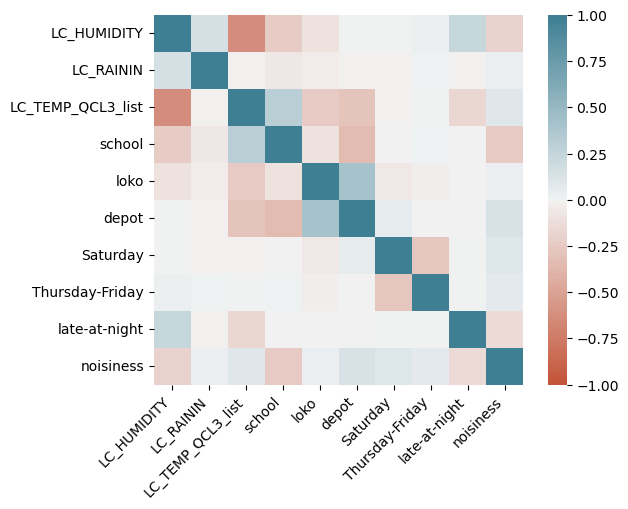

In [61]:
import seaborn as sns
corr=list_df[0][['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list','school', 'loko', 'depot','Saturday','Thursday-Friday','late-at-night','noisiness']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [62]:
# Create an empty dictionary to store accuracy scores
accuracy_scores = {}
predictor_vars = ['LC_HUMIDITY','LC_RAININ','LC_TEMP_QCL3_list','school','loko','depot','Saturday','Thursday-Friday','late-at-night']



Random forest

In [63]:
iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
  rf_model = RandomForestClassifier()
  rf_model.fit(X_train, y_train)
  y_pred_rf = rf_model.predict(X_test)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy_scores[name_df[iter_c]] = {'Random Forest Accuracy': accuracy_rf}
  joblib.dump(value=rf_model,filename='model_'+str(name_df[iter_c])+'.gz',compress=3)
  iter_c = iter_c+1
#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)

       Random Forest Accuracy
df_01                0.706556
df_02                0.718029
df_03                0.737323
df_04                0.749540
df_05                0.720420
df_06                0.702147
df_07                0.718543
df_09                0.714821


XGboost

In [64]:
from xgboost import XGBClassifier

iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
  xgb_model = XGBClassifier(objective="binary:logistic")
  xgb_model.fit(X_train, y_train)
  y_pred_xgb = xgb_model.predict(X_test)
  accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
  accuracy_scores[name_df[iter_c]] = {'XGBoost Accuracy': accuracy_xgb}
  joblib.dump(value=xgb_model, filename='model_'+str(name_df[iter_c])+'.gz',compress=3)
  iter_c = iter_c+1
#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)


       XGBoost Accuracy
df_01          0.700312
df_02          0.703878
df_03          0.738693
df_04          0.729282
df_05          0.722248
df_06          0.687985
df_07          0.706402
df_09          0.705725


lightgbm

In [65]:
from lightgbm import LGBMClassifier

iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)
  lgb_model = LGBMClassifier()
  lgb_model.fit(X_train, y_train)
  y_pred_lgb = lgb_model.predict(X_test)
  accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
  accuracy_scores[name_df[iter_c]] = {'LightGBM Accuracy': accuracy_lgb}
  joblib.dump(value=lgb_model, filename='model_'+str(name_df[iter_c])+'.gz',compress=3)
  iter_c = iter_c+1
#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)


       LightGBM Accuracy
df_01           0.702914
df_02           0.710692
df_03           0.736409
df_04           0.740331
df_05           0.725445
df_06           0.700320
df_07           0.721854
df_09           0.706260


# Random forest with tuning

In [66]:
from sklearn.model_selection import GridSearchCV

iter_c = 0
for iter in list_df:
  data_it = pd.DataFrame(iter)
  data_it = data_it.dropna(subset=['laf50_per_hour'])
  data_it['date'] = pd.to_datetime(data_it['date'])
  X = data_it.loc[:,predictor_vars]
  Y = data_it.loc[:,'noisiness']

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=19)

  # Define the parameters to be tuned
  param_grid = {
      'n_estimators': [100, 200, 500],
      'max_depth' : [10, 15 ,30]
  }

  # Run grid search
  rf = RandomForestClassifier()
  rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
  rf_grid.fit(X_train, y_train)

  # Print the best parameters
  print(f"Best parameters: {rf_grid.best_params_}")

  y_pred_rf = rf_grid.predict(X_test)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy_scores[name_df[iter_c]] = {'Random Forest Accuracy': accuracy_rf}
  
  # Save the best model
  joblib.dump(value=rf_grid.best_estimator_, filename='model_'+str(name_df[iter_c])+'.gz', compress=3)
  
  iter_c = iter_c+1

#loop ends
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index')
print(accuracy_df)


Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best parameters: {'max_depth': 10, 'n_estimators': 500}
Best parameters: {'max_depth': 15, 'n_estimators': 500}
Best parameters: {'max_depth': 15, 'n_estimators': 200}
Best parameters: {'max_depth': 15, 'n_estimators': 200}
Best parameters: {'max_depth': 15, 'n_estimators': 100}
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best parameters: {'max_depth': 10, 'n_estimators': 500}
       Random Forest Accuracy
df_01                0.713840
df_02                0.722746
df_03                0.741891
df_04                0.756906
df_05                0.728186
df_06                0.703974
df_07                0.719095
df_09                0.716426
